# Données multimédia : Python pour le traitement d’images et de données audio

## Master Humanités Numériques du [CESR](https://cesr.univ-tours.fr/)

Clément Plancq (MSH VDL / CITERES)

# Détection d’objets

## Mise en pratique

1. On installe la librairie [ultralytics](https://github.com/ultralytics/ultralytics)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 32.2 MB/s eta 0:00:00


2. On charge le modèle YOLOv11

In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # pretrained YOLOv11n model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 156MB/s]


3. On récupère une image

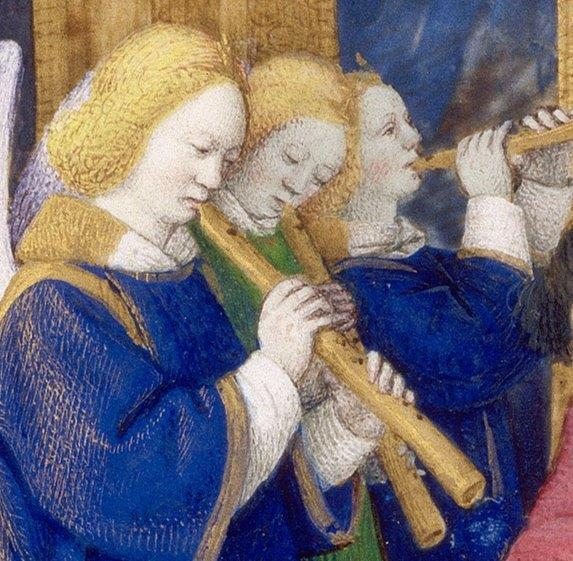

In [2]:
from PIL import Image
from IPython.display import display

#!wget https://farm3.staticflickr.com/2851/9370445254_5a68681e60_z.jpg -q -O input.jpg
#!wget https://cesr.univ-tours.fr/medias/photo/cpr-1130x400_1521210968998-jpg -q -O input.jpg
!wget https://cesr.cnrs.fr/wp-content/uploads/2024/02/Anges-musiciens-heures-chevalier-3.jpg -q -O input.jpg
im = Image.open('./input.jpg')
display(im)

4. On applique le modèle et on affiche le résultat


0: 480x640 2 persons, 2 bottles, 4 cups, 3 bowls, 1 banana, 3 oranges, 3 chairs, 2 potted plants, 1 dining table, 48.0ms
Speed: 10.9ms preprocess, 48.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


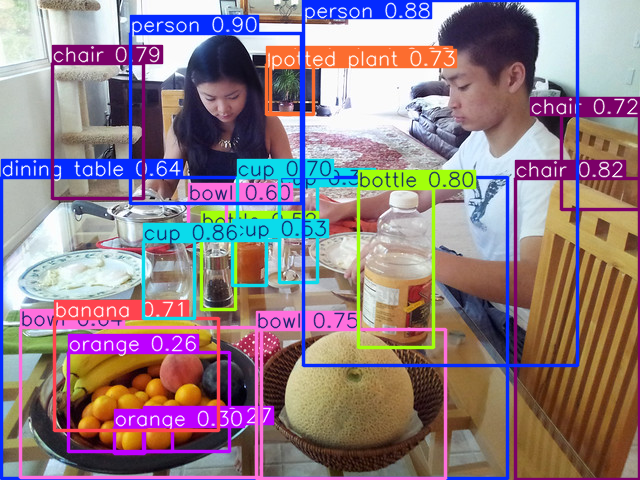

In [ ]:
results = model(im)  # on applique le modèle

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)  # show image

Voilà ! 4 étapes, une dizaine de lignes de Python et on a de la détection d’objets.  
Des décennies de recherche à portée de main (image processing, computer vision, machine learning, deep learning, …). On n’y comprend pas grand chose mais ça a l’air de fonctionner.

Ce traitement on le doit à YOLO (You Only Look Once). YOLO est décrit dans cet article : [https://arxiv.org/abs/1506.02640](https://arxiv.org/abs/1506.02640)  
Ici nous utilisons YOLOv11 implémenté par ultralytics mais il y a d’autres solutions du même type, par exemple :
- Mediapipe : https://github.com/google/mediapipe (Apache-2.0)
- MMDetection : https://github.com/open-mmlab/mmdetection (Apache-2.0)
- Detectron2 : https://github.com/facebookresearch/detectron2 (Apache-2.0)
- YOLO (You Only Look Once) v8 en 2023, v11 en 2024 :  https://github.com/ultralytics/ultralytics (AGPL-3.0)

Essayez avec d’autres images pour vous faire une idée de la performance de la détection d’objet.

## Explications

La détection d’objet (*object detection*) est un des domaines de recherche et d’application de la vision par ordinateur (*computer vision*).

Avec YOLO (ou les autres solutions citées) on est à la confluence de la *computer vision* et du *deep learning*

![source : Beltzung B, Pelé M, Renoult JP and Sueur C (2023) Deep learning for studying drawing behavior: A review. Front. Psychol. 14:992541. doi: 10.3389/fpsyg.2023.992541](https://www.frontiersin.org/files/Articles/992541/fpsyg-14-992541-HTML/image_m/fpsyg-14-992541-g001.jpg)
<figcaption>source : Beltzung B, Pelé M, Renoult JP and Sueur C (2023) Deep learning for studying drawing behavior: A review. Front. Psychol. 14:992541. doi: 10.3389/fpsyg.2023.992541</figcaption>

La détection d’objet est une tâche complexe, on peut la décomposer en 3 volets :
- repérer la localisation de l’objet dans l’image. La localisation se fait avec une *bounding box*.
- extraire les caractéristiques de l’objet
- classifier automatiquement chaque objet

### Apprentissage automatique et apprentissage profond

Je vous donne une vue générale pour comprendre ce qu’on met en œuvre ici.  
Si vous voulez aller plus loin je vous conseille fortement
 - la formation FIDLE : https://www.youtube.com/@CNRS-FIDLE
 - l’ouvrage Dive into Deep Learning disponible en ligne (http://d2l.ai/index.html)
 - le cours « Deep Learning for Computer Vision » de Stanford (http://cs231n.stanford.edu/schedule.html)

Et également les cours de Loïc Grobol, maître de conférences à Paris Nanterre :
 - [apprentissage artificiel](https://loicgrobol.github.io/apprentissage-artificiel/)
 - [réseaux de neurones](https://loicgrobol.github.io/neural-networks/)

Pour comprendre l’impact qu’ont eu et qu’ont encore les réseaux de neurones dans la recherche vous pouvez lire :  CARDON Dominique, COINTET Jean-Philippe, MAZIèRES Antoine, « La revanche des neurones. L’invention des machines inductives et la controverse de l’intelligence artificielle », Réseaux, 2018/5 (n° 211), p. 173-220. DOI : 10.3917/res.211.0173. URL : https://www.cairn.info/revue-reseaux-2018-5-page-173.htm

#### Résolution de tâche

En apprentissage automatique on cherche à résoudre des tâches précises. On n’a pas ou pas encore d’intelligence artificielle générale. Ces tâches peuvent être : la détection d’objet, la génération de texte, la reconnaissance d’écriture manuscrite, …

#### Les données au centre

L’apprentissage automatique est centré sur les données. On utilise des méthodes statistiques pour donner à un programme la capacité d’apprendre à résoudre une tâche spécifique à partir d’un jeu de données (*dataset*).  

Il n’y a pas de modélisation de la connaissance *a priori*. Pour apprendre à un modèle à reconnaître une photo de chat on ne cherche pas à définir les caractéristiques d’un chat (il a des moustaches, des oreilles pointues, des coussinets, …). On lui soumet une grande quantité d’images où l’on sait lesquelles sont des chats, lesquelles non et le modèle « apprend ».

Par exemple pour la détection d’objet on va utiliser un ensemble d’images où les objets ont déjà été repérés. Il en faudra beaucoup pour *entraîner* un modèle. L’entraînement est la phase cruciale de l’apprentissage automatique et il repose en grande partie sur les données. Si le volume des données est insuffisant ou si les données sont trop brutées le modèle produit aura des performances dégradées.

Pensez à toutes les fois où vous avez dû cliquer sur des feux de circulation ou des voitures pour accéder à une ressource. Vous avez participé à la constitution de données d’entraînement !

Pour le *machine learning* sur les images, le corpus de données le plus célèbre est ImageNet : https://image-net.org/  
On peut aussi citer le dataset COCO (https://cocodataset.org)

#### Perceptron

Le perceptron peut être vu comme le type de réseau de neurones le plus simple. C'est un classifieur linéaire. Dans sa version simplifiée, le perceptron est mono-couche et n'a qu'une seule sortie (booléenne) à laquelle toutes les entrées (booléennes) sont connectées.

Formulé célèbrement par McCulloch et Pitts (1943) avec des notations différentes.

Implémenté comme une machine, le perceptron Mark I, par Rosenblatt (1958) :

[![Une photographie en noir et blanc d'une machine ressemblant à une grande armoire pleine de fils
électriques](https://upload.wikimedia.org/wikipedia/en/5/52/Mark_I_perceptron.jpeg)](https://en.wikipedia.org/wiki/File:Mark_I_perceptron.jpeg)


Un perceptron est une unité qui reçoit plusieurs entrées $x_j$
scalaires, il en calcule une somme pondérée $z$ (avec des poids $w_j$ prédéfinis) et
renvoie une sortie binaire $y$ ($1$ si $z$ est positif, $0$ sinon).

Soit :

$$
\begin{align}
z &= \sum_j w_jx_j = w_1 x_1 + w_2 x_2 + … + w_n x_n\\
\hat{y} &=
    \begin{cases}
        1 & \text{si $z > 0$}\\
        0 & \text{sinon}
    \end{cases}
\end{align}
$$



In [ ]:
## Une implémentation naïve en Python

def perceptron(inpt, weight):
    z = weight[0] # On commence par le terme de biais
    for i in range(len(inpt)):  # Attention, en Python les indices commencent à 0
        z += inpt[i]*weight[i]
    if z > 0:
        y = 1
    else:
        y = 0
    return y

perceptron([-2.0, -1.0], [-0.5, 0.5])

0



#### Fonction de coût (*loss function*) et optimisation

Comment fonctionne cet entraînement sur les données ?

Le modèle fait des prédictions à partir des données. Par exemple il va déterminer si une image contient un chat ou non. Cette prédiction peut être juste ou fausse.  
La fonction de coût (ou fonction de perte, *loss function*) va quantifier l’écart entre les prédictions du modèle et les valeurs attendues.

![](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/neural-network-loss.jpg?resize=768%2C407&ssl=1)
<figcaption>Source : https://neptune.ai/blog/pytorch-loss-functions</figcaption>

On va chercher à réduire au maximum ce coût, cet écart entre les prédictions et les valeurs des données d’entraînement.

Pour cela on va faire un grand nombre d’itérations selon la procédure suivante :

1. Initialisation : Les poids et les biais du modèle (les paramètres internes) sont initialement définis à des valeurs aléatoires.

2. Calcul du Coût : On évalue la performance du modèle en calculant la différence entre les prédictions du modèle et les vraies valeurs.

3. Calcul du Gradient : Le gradient est essentiellement une indication de la direction dans laquelle la fonction de coût augmente le plus rapidement. Il guide la mise à jour des paramètres du modèle.

4. Mise à Jour des Paramètres : Les paramètres du modèle sont ajustés dans la direction opposée au gradient pour réduire la valeur de la fonction de coût.

5. Répétition : Les étapes 2 à 4 sont répétées de manière itérative jusqu'à ce que la fonction de coût soit minimisée autant que possible.


#### Couches

![](https://assets.website-files.com/5ac6b7f2924c652fd013a891/5d52f0972ca59a532d984d0e_s_39292DB9CE2A9400103E176C2ABC438C6A626910E9DBB0D6FBE28EE673C7492C_1565465188363_LearningE_500.jpeg)

On parle de *deep learning* quand il y a au moins trois couches dans un réseau de neurones : la couche d’entrée (les données), la couche de sortie (les prédictions) et les couches cachées entre les deux.

Chaque couche est composée de neurones. Chaque neurone est connecté aux neurones de la couche précédente, cette connexion porte un poids. Ces poids ce sont les paramètres ajustables du modèle qui sont « appris » lors de l’entraînement.

Chaque neurone a une fonction d’activation qui prend en compte les activations des neurones de la couche précédente et les poids des connexions.  
Au final on a des relations très complexes dans le modèle. On parle de non-linéarité des modèles.

On peut s’appuyer sur cette choutte visualisation pour avoir un exemple : [http://playground.tensorflow.org/](http://playground.tensorflow.org/)

## YOLO again

Maintenant nous savons un peu mieux ce que nous manipulons quand nous chargeons un modèle.

Voyons comment nous pouvons exploiter les résultats.

À partir de la documentation (https://docs.ultralytics.com/modes/predict/) nous allons essayer :
- de ne retenir que les objets détectés avec un taux de confiance >= 0.7
- puis nous ajouterons un critére de sélection sur les classes, par exemple que les personnes et les animaux.

In [ ]:
# Un seul objet Results dans la liste result
result = results[0]
for key, name in result.names.items():
  print(name)

# On va s'intéresser aux objets Boxes contenu dans le résultat
# (un objet Boxes par objet détecté)
conf_threshold = 0.7 # notre seuil de taux de confiance

for box in result.boxes:
  if box.conf > conf_threshold:
    print(box.conf) # les objets dont les % de confiance sont > à 0.7

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush
tensor([0.8962], device='cuda:0')
tensor([0.8778], device='cuda:0')
tensor([0.8627], device='cuda:0')
tensor([0.8226], device='cuda:0')
tensor([0.7985], device='cuda:0')
tensor([0.7858], device='cuda:0')
tensor([0.7549], device='cuda:0')
tensor([0.7341], device='cuda:0')
tensor([0.7207], device='cuda:0')
tensor([0.7144], device='cuda:0')


In [ ]:
# Un seul objet Results dans la liste result
result = results[0]

# On va s'intéresser aux objets Boxes contenu dans le résultat
# (un objet Boxes par objet détecté)
print(f"Il y a {len(result.boxes)} objets détectés par YOLO")
conf_threshold = 0.5 # notre seuil de taux de confiance

for box in result.boxes:
  if box.conf > conf_threshold:
    key = int(box.cls[0]) # on transforme l'attribut cls (Tensor) en valeur entière
    category = result.names[key] # on récupère la catégorie associée à la classe
    print(f"{category} (confiance : {box.conf[0]})")


Il y a 21 objets détectés par YOLO
person (confiance : 0.8961590528488159)
person (confiance : 0.8778074383735657)
cup (confiance : 0.8627443313598633)
chair (confiance : 0.8226150870323181)
bottle (confiance : 0.7985454201698303)
chair (confiance : 0.7858216762542725)
bowl (confiance : 0.7548876404762268)
potted plant (confiance : 0.7341461777687073)
chair (confiance : 0.7206793427467346)
banana (confiance : 0.7144148349761963)
cup (confiance : 0.6987840533256531)
bowl (confiance : 0.6425402760505676)
dining table (confiance : 0.6399866938591003)
bowl (confiance : 0.5962396264076233)
cup (confiance : 0.5263670086860657)
bottle (confiance : 0.5153974294662476)


- Faites varier la valeur du seuil et affichez les résultats
- Essayez le même résultat sur d’autres images, un manuscrit, une peinture
- Essayez avec une autre image de type photo